### Projet Capston - **_Detection Fraud IEEE-CIS_** -


### 🧭 **_Introduction_**

La **_fraude_** financière en ligne représente un <u>défi majeur</u> pour les **_institutions et les plateformes d’e-commerce_**. Avec la multiplication des transactions numériques, les fraudeurs déploient des méthodes de plus en plus <u>sophistiquées</u>, rendant la détection de ces activités illégitimes complexe.

Ce projet vise à développer un modèle de machine learning **_capable d’identifier automatiquement les transactions frauduleuses_** à partir du dataset IEEE-CIS Fraud Detection (Kaggle). Ce jeu de données, riche et déséquilibré, permet d’aborder un cas réel de classification supervisée à grande échelle, tout en appliquant les étapes essentielles du pipeline de data science.

L’objectif final est de **_maximiser la détection des fraudes (recall élevé)_** tout en **_minimisant les fausses alertes_**, afin d’améliorer la **_sécurité et la confiance dans les paiements en ligne_**.

### 📘 **_Plan du Notebook_**

- 1_  Importation et Préparation des Données
- 2_  Analyse Exploratoire des Données (EDA)
- 3_  Prétraitement des Données
- 4_  Gestion du Déséquilibre des Classes
- 5_  Modélisation
- 6_  Évaluation et Interprétation du Modèle  
- 7_  Conclusion et Perspectives

### 1_ **_Importation et Préparation des Données_**

In [88]:
# importons les biblothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [89]:
#Chargeons des fichiers transaction.csv et identity.csv
transactions = pd.read_csv('../dataset/train_transaction.csv')

In [90]:
#transaction
transactions.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [91]:
#choisir les colonnes à utiliser pour l'analyse
columns_to_use = [
    'TransactionID', 'TransactionAmt', 'ProductCD',
    'card1', 'card2', 'card3', 'card4', 'card5', 'card6',
    'addr1', 'addr2', 'dist1', 'dist2',
    'P_emaildomain', 'R_emaildomain',
    'C1', 'C2','isFraud'
]

#Avant de choisir les colonnes à utiliser, on doit faire une copie du dataframe
transactions_copy = transactions.copy()

#Sélectionner les colonnes choisies
transactions_subset = transactions_copy[columns_to_use]

transactions_subset.head()

,TransactionID,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,isFraud
0,2987000,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0
1,2987001,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0
2,2987002,59.0,W,4663,490.0,150.0,visa,166.0,debit,330.0,87.0,287.0,NaN,outlook.com,NaN,1.0,1.0,0
3,2987003,50.0,W,18132,567.0,150.0,mastercard,117.0,debit,476.0,87.0,NaN,NaN,yahoo.com,NaN,2.0,5.0,0
4,2987004,50.0,H,4497,514.0,150.0,mastercard,102.0,credit,420.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0


In [92]:
#Verifions les doublons
transactions_subset.duplicated().sum()

np.int64(0)

#####  1.1 **_Analyse des types de variables et des valeurs manquantes._**

In [93]:
#Afficher les informations sur le dataframe
transactions_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   TransactionID   590540 non-null  int64  
 1   TransactionAmt  590540 non-null  float64
 2   ProductCD       590540 non-null  object 
 3   card1           590540 non-null  int64  
 4   card2           581607 non-null  float64
 5   card3           588975 non-null  float64
 6   card4           588963 non-null  object 
 7   card5           586281 non-null  float64
 8   card6           588969 non-null  object 
 9   addr1           524834 non-null  float64
 10  addr2           524834 non-null  float64
 11  dist1           238269 non-null  float64
 12  dist2           37627 non-null   float64
 13  P_emaildomain   496084 non-null  object 
 14  R_emaildomain   137291 non-null  object 
 15  C1              590540 non-null  float64
 16  C2              590540 non-null  float64
 17  isFraud   

In [94]:
#Affichons les les valeurs manquantes de chaque colonne
missing_values = transactions_subset.isnull().sum()

missing_values

TransactionID          0
TransactionAmt         0
ProductCD              0
card1                  0
card2               8933
card3               1565
card4               1577
card5               4259
card6               1571
addr1              65706
addr2              65706
dist1             352271
dist2             552913
P_emaildomain      94456
R_emaildomain     453249
C1                     0
C2                     0
isFraud                0
dtype: int64

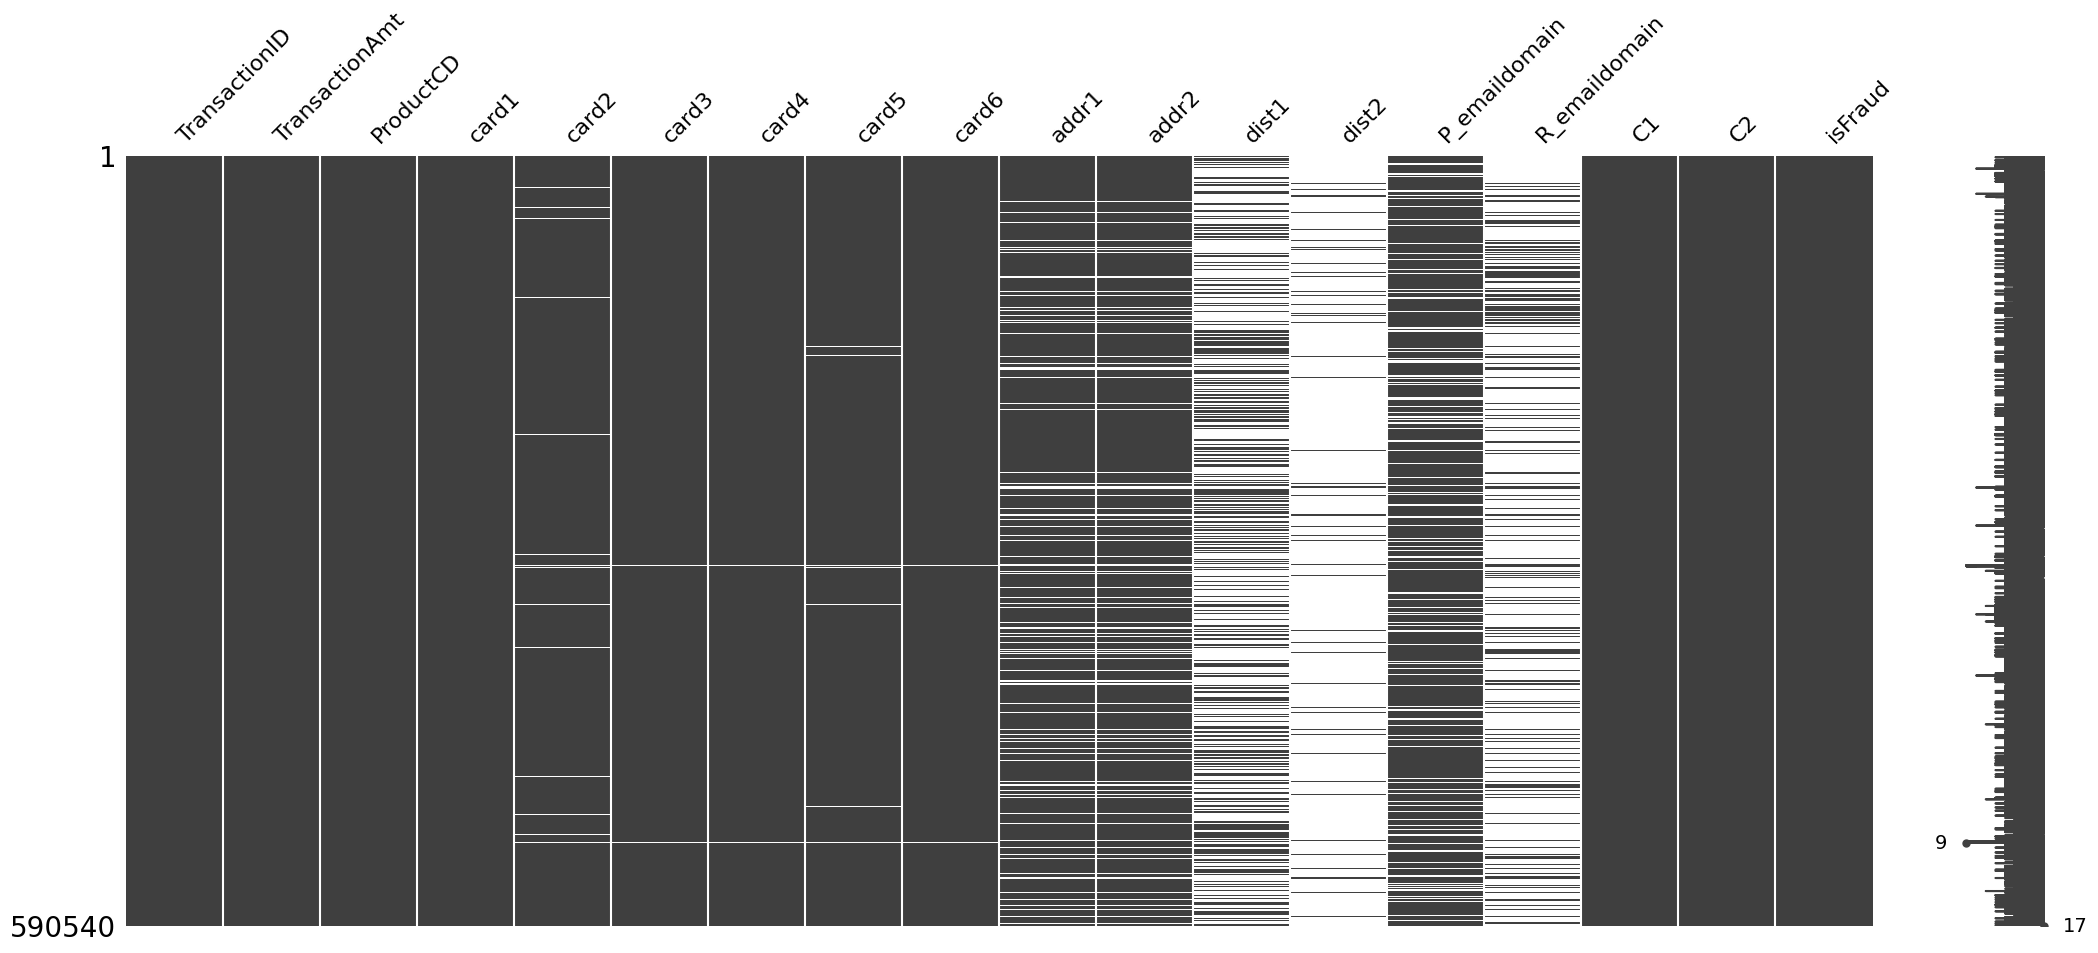

In [95]:
# Visualisons les valeurs manquantes avec missingno
import missingno as msno

msno.matrix(transactions_subset)
plt.show()

In [96]:
#Tableau des valeurs manquantes avec leurs pourcentages
missing_values = transactions_subset.isnull().sum()
missing_percentage = (missing_values / len(transactions_subset)) * 100
missing_table = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print(missing_table)

                Missing Values  Percentage
TransactionID                0    0.000000
TransactionAmt               0    0.000000
ProductCD                    0    0.000000
card1                        0    0.000000
card2                     8933    1.512683
card3                     1565    0.265012
card4                     1577    0.267044
card5                     4259    0.721204
card6                     1571    0.266028
addr1                    65706   11.126427
addr2                    65706   11.126427
dist1                   352271   59.652352
dist2                   552913   93.628374
P_emaildomain            94456   15.994852
R_emaildomain           453249   76.751617
C1                           0    0.000000
C2                           0    0.000000
isFraud                      0    0.000000


#####  **_Pour gerer les valeurs manquantent on va supprimer les variable qui ont un pourcentage > 80 et faire l'imputation selon l’impact business pour les variables < 80%_**

In [113]:
#On va supprimmr la colonne dist2 avec plus de 80% de valeurs manquantes
transactions_subset.drop(["dist2"], axis=1 , inplace=True)

C:\Users\abdue\AppData\Local\Temp\ipykernel_18600\3596147220.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transactions_subset.drop(["dist2"], axis=1 , inplace=True)


In [114]:
#Remplacement des valeurs manquantes de dist1 par la médiane
transactions_subset['dist1'].fillna(transactions_subset['dist1'].median(), inplace=True)


C:\Users\abdue\AppData\Local\Temp\ipykernel_18600\2746760065.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  transactions_subset['dist1'].fillna(transactions_subset['dist1'].median(), inplace=True)
C:\Users\abdue\AppData\Local\Temp\ipykernel_18600\2746760065.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transactions_subset['dist1'].f

In [115]:
#Remplacement des valeurs manquantes dans R_emaildomain par 'unknown'
transactions_subset['R_emaildomain'].fillna('unknown' , inplace=True)

C:\Users\abdue\AppData\Local\Temp\ipykernel_18600\542050111.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  transactions_subset['R_emaildomain'].fillna('unknown' , inplace=True)
C:\Users\abdue\AppData\Local\Temp\ipykernel_18600\542050111.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transactions_subset['R_emaildomain'].fillna('unknow

In [118]:
#Nettoyage des colonnes cardX

num_card_cols = ['card2', 'card3', 'card5']
cat_card_cols = ['card4', 'card6']

# Imputation numérique : médiane
for col in num_card_cols:
    transactions_subset[col].fillna(transactions_subset[col].median() , inplace=True)

# Imputation catégorielle : Unknown
for col in cat_card_cols:
    transactions_subset[col].fillna('Unknown', inplace=True)

#Nettoyage des adresses
transactions_subset['addr1'].fillna(transactions_subset['addr1'].median(), inplace=True)
transactions_subset['addr2'].fillna(transactions_subset['addr2'].median(), inplace=True)

#Nettoyage des emails
transactions_subset['P_emaildomain'].fillna('Unknown', inplace=True)

C:\Users\abdue\AppData\Local\Temp\ipykernel_18600\3411327233.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  transactions_subset[col].fillna(transactions_subset[col].median() , inplace=True)
C:\Users\abdue\AppData\Local\Temp\ipykernel_18600\3411327233.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transactions_subset[col].fillna(trans

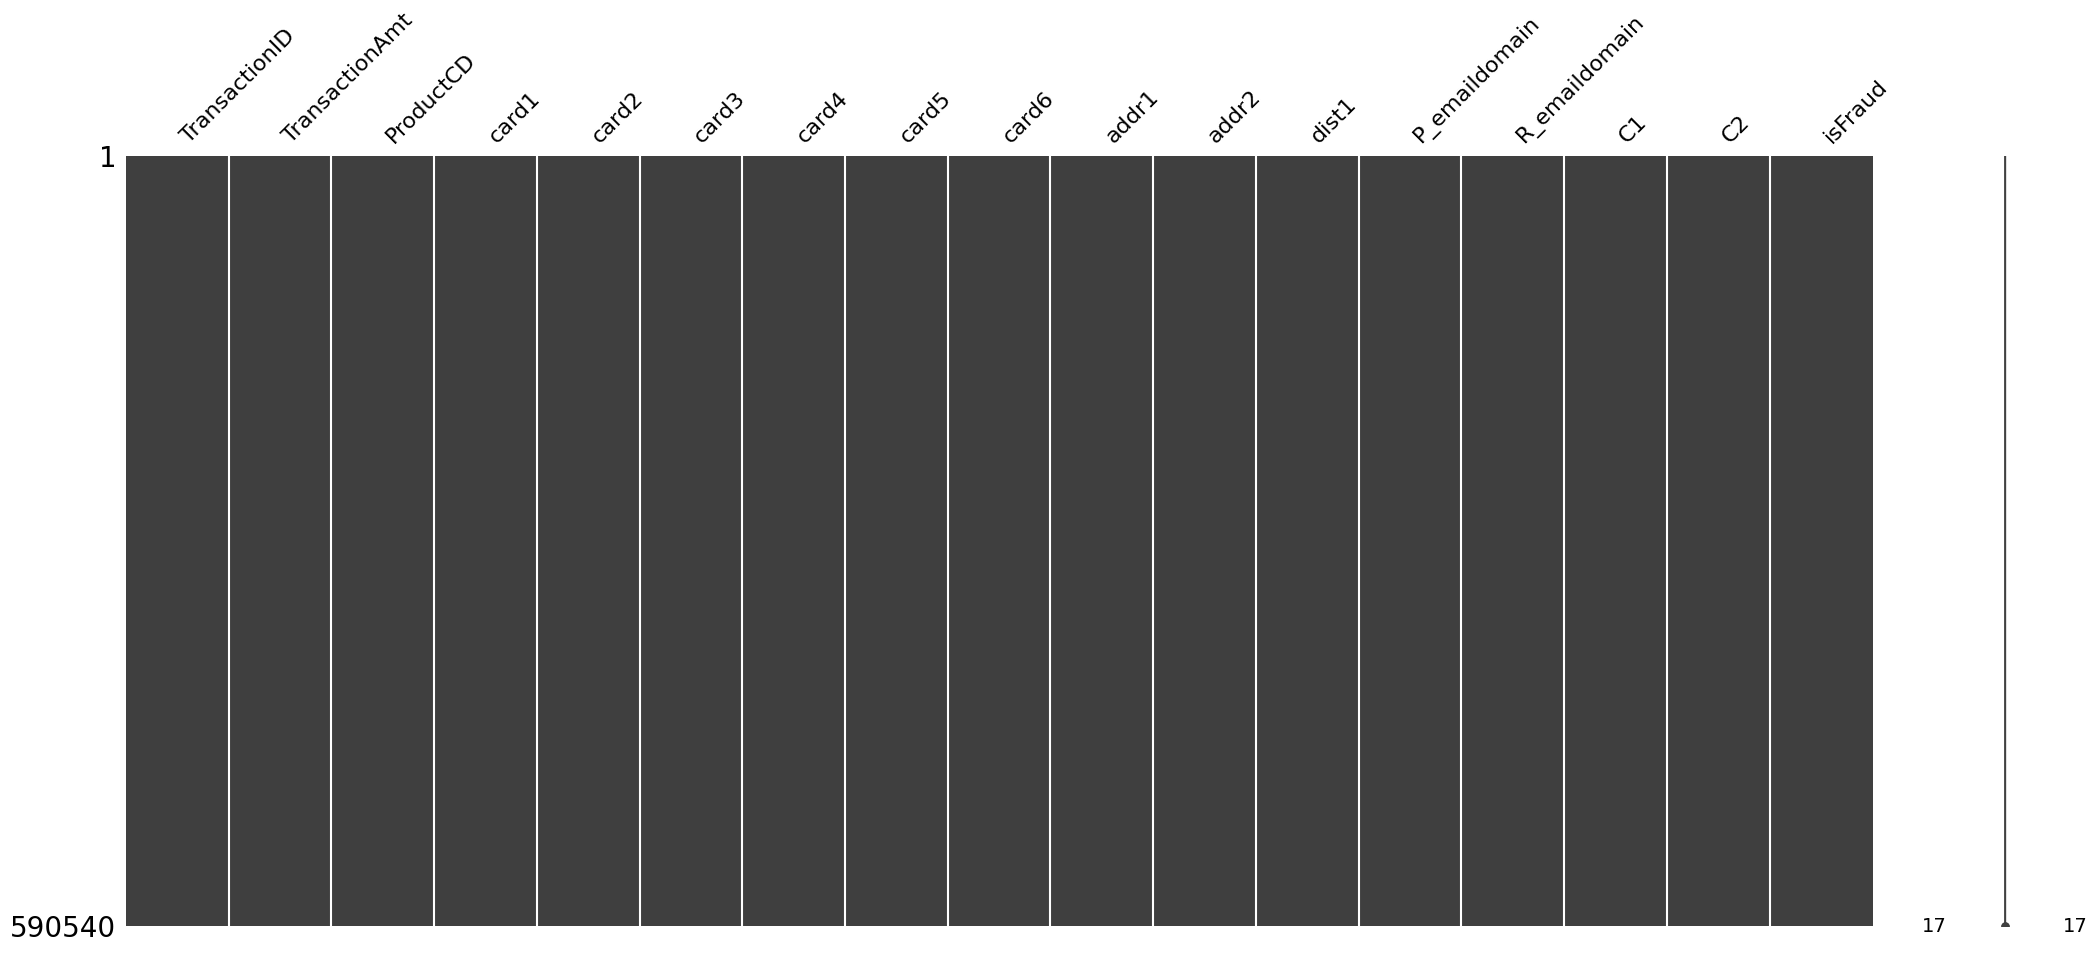

In [119]:
#Resultat final après le nettoyage
msno.matrix(transactions_subset)
plt.show()

### 2- **_Analyse Exploratoire des Données (EDA)_**

##### **_2.1 Statistiques descriptives globales_**

In [102]:
#statistiques descriptives des colonnes numériques
transactions_subset.describe()

,TransactionID,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,dist2,C1,C2,isFraud
count,5.905400e+05,590540.000000,590540.000000,581607.000000,588975.000000,586281.000000,524834.000000,524834.000000,238269.000000,37627.000000,590540.000000,590540.000000,590540.000000
mean,3.282270e+06,135.027176,9898.734658,362.555488,153.194925,199.278897,290.733794,86.800630,118.502180,231.855423,14.092458,15.269734,0.034990
std,1.704744e+05,239.162522,4901.170153,157.793246,11.336444,41.244453,101.741072,2.690623,371.872026,529.053494,133.569018,154.668899,0.183755
min,2.987000e+06,0.251000,1000.000000,100.000000,100.000000,100.000000,100.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.134635e+06,43.321000,6019.000000,214.000000,150.000000,166.000000,204.000000,87.000000,3.000000,7.000000,1.000000,1.000000,0.000000
50%,3.282270e+06,68.769000,9678.000000,361.000000,150.000000,226.000000,299.000000,87.000000,8.000000,37.000000,1.000000,1.000000,0.000000
75%,3.429904e+06,125.000000,14184.000000,512.000000,150.000000,226.000000,330.000000,87.000000,24.000000,206.000000,3.000000,3.000000,0.000000
max,3.577539e+06,31937.391000,18396.000000,600.000000,231.000000,237.000000,540.000000,102.000000,10286.000000,11623.000000,4685.000000,5691.000000,1.000000


##### **_💡 Interprétation :_**

Dans cette simple description des variables numerique dans ce jeu de donnee, cela nous montre que nous avons des variables à des échelles complètement différentes, ce qui nécessite très probablement un StandardScaler dans les prochaine etapes.

##### **_2.2 Type de carte et fraude_**

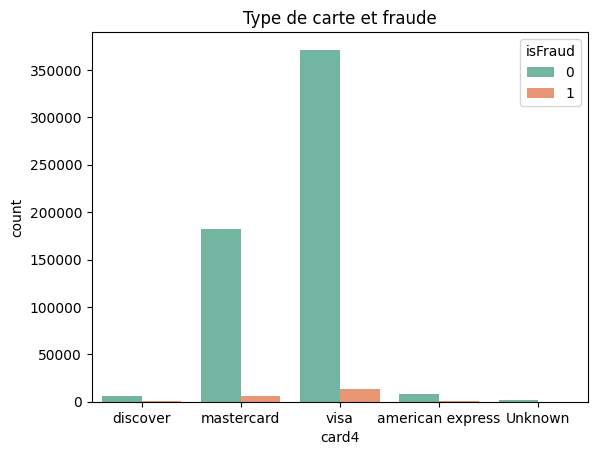

In [103]:
sns.countplot(data=transactions_subset, x='card4', hue='isFraud', palette='Set2')
plt.title('Type de carte et fraude')
plt.show()

##### **_💡 Interprétation :_**

On voit que les clients utilisent beaucoup les cartes visa et mastercard pour faire des transactions,alors les fraudeures n'echappent
 pas l'utilisation de cette carte pour y parvenir.

##### **_2.3 Distribution de la variable cible (fraude vs non fraude)_**

In [104]:
transactions_subset['isFraud'].value_counts(normalize=True)*100

isFraud
0    96.500999
1     3.499001
Name: proportion, dtype: float64

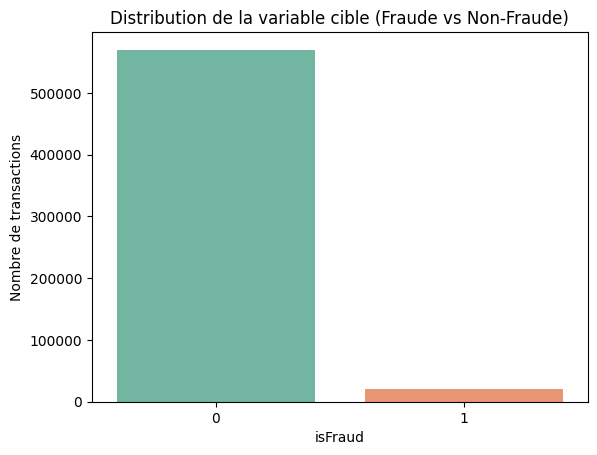

In [105]:
#Visualisation de la distribution de la variable cible
sns.countplot(data=transactions_subset, x='isFraud', hue='isFraud', palette='Set2', legend=False)
plt.title("Distribution de la variable cible (Fraude vs Non-Fraude)")
plt.xlabel("isFraud")
plt.ylabel("Nombre de transactions")
plt.show()

##### **_💡 Interprétation :_**

Ce graphique nous montre que les transaction frauduleuse representent seulement 3.5% dans le jeu de donnee

##### **_2.4 Analyse et visualisation des domaines email_**

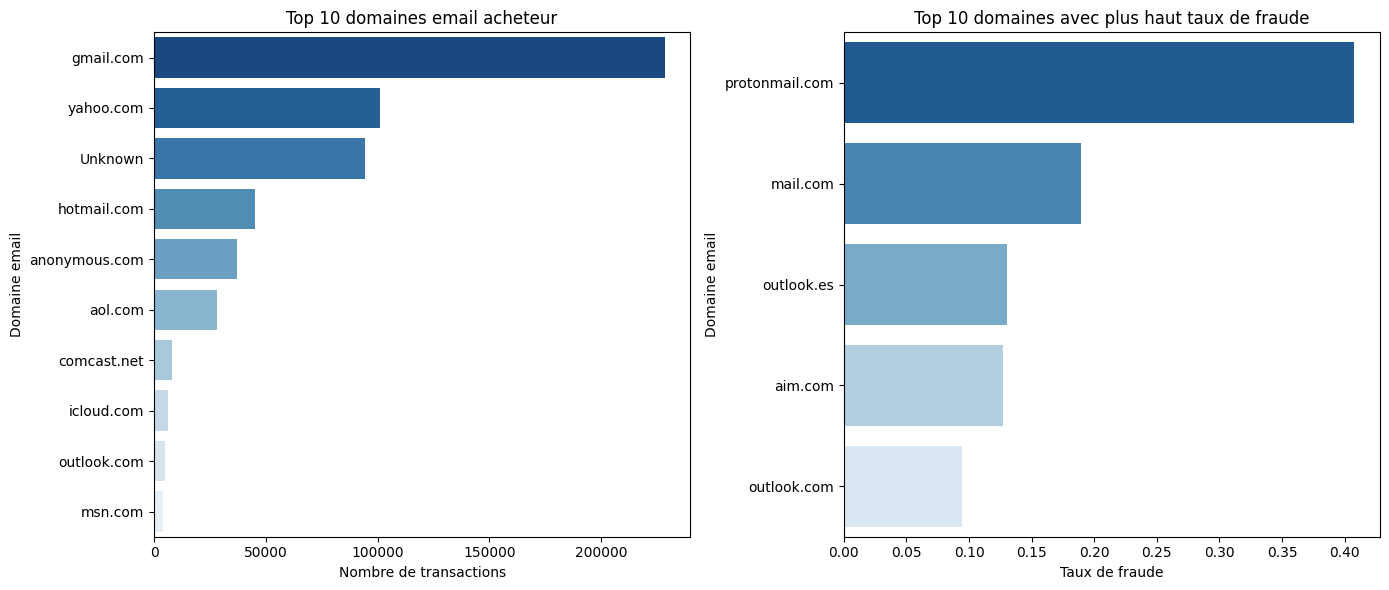

In [106]:
def analyse_emails(df):
    # Top 10 domaines email acheteur
    top_domains = df['P_emaildomain'].value_counts().head(10)
    
    # Taux de fraude par domaine
    domain_fraud = df.groupby('P_emaildomain')['isFraud'].mean().sort_values(ascending=False).head()
    
    #  Visualisation
    plt.figure(figsize=(14,6))
    
    # Graphique 1 : top domaines
    plt.subplot(1, 2, 1)
    sns.barplot(x=top_domains.values, y=top_domains.index,hue=top_domains.index,palette='Blues_r', legend=False)
    plt.title("Top 10 domaines email acheteur")
    plt.xlabel("Nombre de transactions")
    plt.ylabel("Domaine email")
    
    # Graphique 2 : domaines avec plus haut taux de fraude
    plt.subplot(1, 2, 2)
    sns.barplot(x=domain_fraud.values, y=domain_fraud.index, hue=domain_fraud.index,palette='Blues_r',legend=False)
    plt.title("Top 10 domaines avec plus haut taux de fraude")
    plt.xlabel("Taux de fraude")
    plt.ylabel("Domaine email")
    
    plt.tight_layout()
    plt.show()

analyse_emails(transactions_subset)

##### **_💡 Interprétation :_**

Les acheteurs utilisent beaucoup les domaines email comme **_gmail.com, yahoo.com_** avec plus de **_180 000 transactions**, Mais ce qui ne signifie 
pas que touts ces acheteurs commaittaient des transactions frauduleuses, ce qui prouve avec le deuxieme graphe qui montre que les acheteurs qui utilisent **_protonmail.com_** on plus de **_38% transaction frauduleuses_** 

##### **_2.5 Analyse et visualisation des features géographiques_**

Top 10 addr1 avec plus haut taux de fraude:
       count    mean
addr1               
483.0     23  0.5652
391.0     35  0.4571
431.0     38  0.3421
432.0     38  0.2895
216.0     54  0.2407
479.0     13  0.2308
296.0    367  0.2125
161.0    421  0.1948
239.0     31  0.1935
453.0     21  0.1905


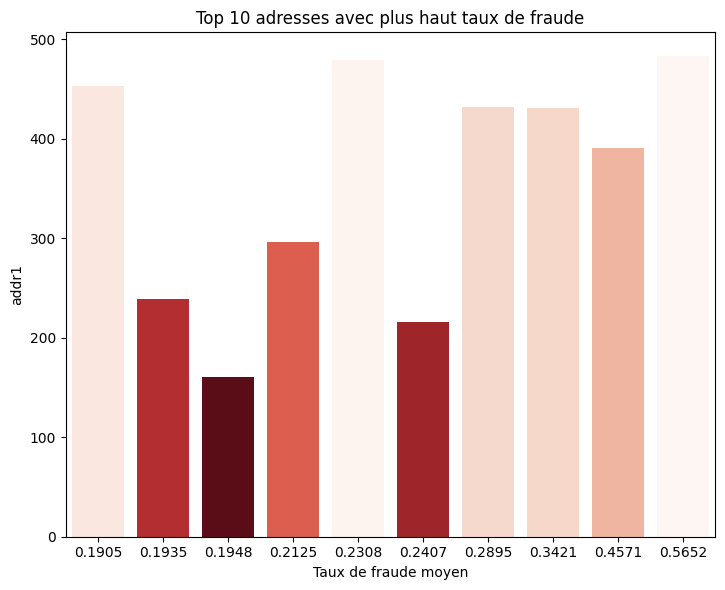

In [107]:
def analyse_geographique(df):
  
    #  Calculs principaux
    addr_fraud = df.groupby('addr1')['isFraud'].agg(['count', 'mean']).round(4)
    addr_fraud = addr_fraud[addr_fraud['count'] > 10]  # Filtrer les adresses rares
    
    print("Top 10 addr1 avec plus haut taux de fraude:")
    print(addr_fraud.nlargest(10, 'mean'))
    
    # Sélection des top 10 pour les graphiques
    top_fraud_rate = addr_fraud.nlargest(10, 'mean')
    top_counts = addr_fraud.nlargest(10, 'count')
    
    # Visualisation
    plt.figure(figsize=(14,6))
    
    # Graphique 1 : taux de fraude
    plt.subplot(1, 2, 1)
    sns.barplot(x=top_fraud_rate['mean'], y=top_fraud_rate.index, hue=top_fraud_rate.index, palette='Reds_r', legend=False)
    plt.title("Top 10 adresses avec plus haut taux de fraude")
    plt.xlabel("Taux de fraude moyen")
    plt.ylabel("addr1")
    
    plt.tight_layout()
    plt.show()


analyse_geographique(transactions_subset)

##### **_💡 Interprétation :_**



Ce graphe nous montre que les zones geographique **_483, 391_** sont tres dangereux et **_431, 432_** ont une haute risque, ce qui nécessite une intervention imediate. 

#### **_2.6 Analyse des corrélations importantes_**

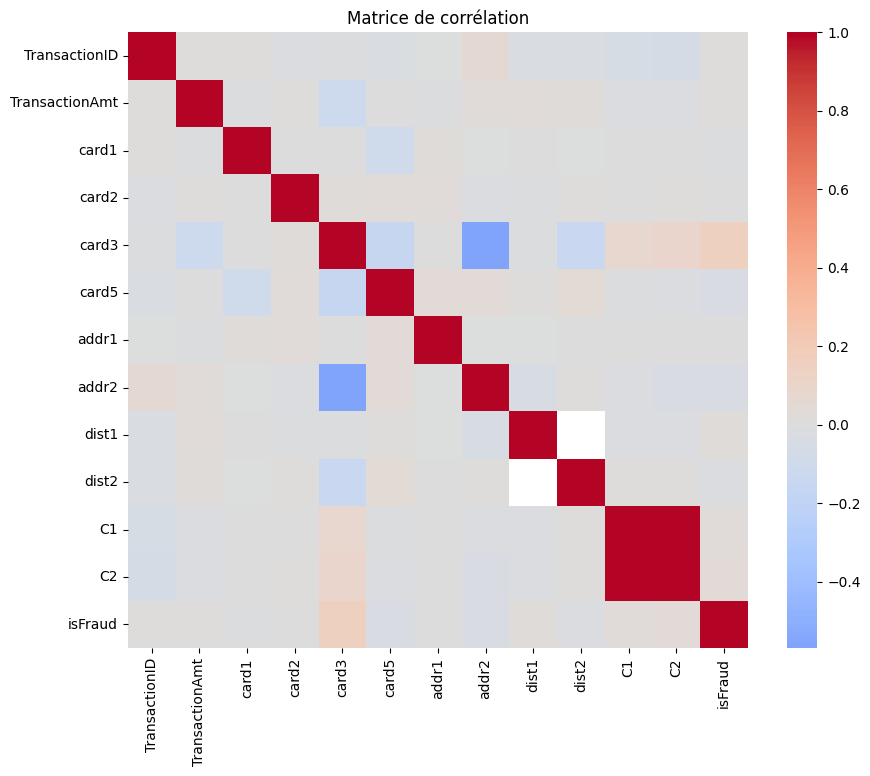

In [108]:
# Corrélation globale (pour variables numériques)
corr = transactions_subset.corr(numeric_only=True)

# Heatmap des corrélations
plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title("Matrice de corrélation")
plt.show()

In [109]:
# Corrélation entre les variables et isFraud
corr_target = corr['isFraud'].sort_values(ascending=False)
print(corr_target.head(10))

isFraud           1.000000
card3             0.154151
C2                0.037229
C1                0.030570
dist1             0.021522
TransactionID     0.014166
TransactionAmt    0.011320
addr1             0.005596
card2             0.003388
card1            -0.013640
Name: isFraud, dtype: float64


##### **_💡 Interprétation :_**

1.  Aucune variable ici n’a une corrélation forte avec isFraud.
→ C’est normal dans ce type de dataset : la fraude dépend d’un ensemble de signaux faibles combinés plutôt que d’un seul facteur évident.

2. card3 ressort un peu du lot avec 0.15 → on devrait la garder car il y a une correlation normale (pas trop forte) avec isFraud.

3. C1 et C2 montrent une légère tendance → elles peuvent aussi aider le modèle à discriminer les classes.

4. Les autres (card1, card2, addr1, dist1, TransactionAmt) ont peu d’influence individuelle, mais peuvent être importantes en combinaison dans un modèle non linéaire (Random Forest, XGBoost...).